# 1. Import dữ liệu

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Customers = pd.read_csv(r"D:\DataWarehouse and DataMining\DataMining\BaoCaoNhom\Ecommerce\olist_customers_dataset.csv")
Order_payments = pd.read_csv(r"D:\DataWarehouse and DataMining\DataMining\BaoCaoNhom\Ecommerce\olist_order_payments_dataset.csv")
Orders = pd.read_csv(r"D:\DataWarehouse and DataMining\DataMining\BaoCaoNhom\Ecommerce\olist_orders_dataset.csv")

In [3]:
dataset = {
    'Customers': Customers,
    'Payments': Order_payments,
    'Orders': Orders,
}

for x, y in dataset.items():
    print(f'{x}', (list(y.shape)))
    print(f'{x}', f'{list(y.columns)}')
    print('\n')

Customers [99441, 5]
Customers ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


Payments [103886, 5]
Payments ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']


Orders [99441, 8]
Orders ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']




In [4]:
# Kiểm tra dataset nào bị null
for x, y in dataset.items():
    print(f'{x}: {y.isnull().any().any()}')

Customers: False
Payments: False
Orders: True


In [5]:
# Đếm số giá trị null
for x, y in dataset.items():
    if y.isnull().any().any():
        print(f'{x}', (list(y.shape)),'\n')
        print(f'{y.isnull().sum()}\n')

Orders [99441, 8] 

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64



In [6]:
Orders = Orders.drop(columns=['order_approved_at' , 'order_delivered_customer_date', 'order_delivered_carrier_date','order_estimated_delivery_date'])

## - Merge

In [7]:
df = Orders.merge(Customers, on='customer_id')
df = df.merge(Order_payments, on = 'order_id')

In [8]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12


In [9]:
df = df.drop(columns=['customer_id','payment_installments'])

In [10]:
df.to_csv('df.csv', index=False)

In [11]:
df.shape

(103886, 10)

In [12]:
df.isnull().sum()

order_id                    0
order_status                0
order_purchase_timestamp    0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
payment_sequential          0
payment_type                0
payment_value               0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

# 2. Tính R,F,M

In [14]:
from datetime import timedelta, datetime
import squarify

In [15]:
df.columns

Index(['order_id', 'order_status', 'order_purchase_timestamp',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_value'],
      dtype='object')

In [16]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')

In [17]:
print('{:,} rows; {:,} columns'
      .format(df.shape[0], df.shape[1]))
print('{:,} transactions don\'t have a customer id'
      .format(df[df.customer_unique_id.isnull()].shape[0]))
print('Transactions timeframe from {} to {}'.format(df['order_purchase_timestamp'].min(),
                                    df['order_purchase_timestamp'].max()))

103,886 rows; 10 columns
0 transactions don't have a customer id
Transactions timeframe from 2016-09-04 21:15:19 to 2018-10-17 17:30:18


In [18]:
import pandas as pd
import datetime

# 1. Calculate Recency (R)
# Get the maximum transaction date and add one day
current_date = max(df['order_purchase_timestamp']) + datetime.timedelta(days=1)

# 2. Calculate Total_Price
# df['TotalPay'] = df['Quantity'] * df['UnitPrice']



# 3. Group by customer_unique_id to calculate R, F, M
rfm_df = df.groupby(['customer_unique_id']).agg(
    Recency=('order_purchase_timestamp', lambda x: (current_date - x.max()).days),  # Recency
    Frequency=('order_id', lambda x: x.nunique()),  # Frequency
    Monetary=('payment_value', lambda x: x.sum())  # Monetary
).reset_index()

# Display the RFM DataFrame
print(rfm_df.head())


                 customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      161          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      164          1     27.19
2  0000f46a3911fa3c0805444483337064      586          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      370          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      337          1    196.89


In [19]:
rfm_df

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19
2,0000f46a3911fa3c0805444483337064,586,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89
...,...,...,...,...
96090,fffcf5a5ff07b0908bd4e2dbc735a684,496,1,2067.42
96091,fffea47cd6d3cc0a88bd621562a9d061,311,1,84.58
96092,ffff371b4d645b6ecea244b27531430a,618,1,112.46
96093,ffff5962728ec6157033ef9805bacc48,169,1,133.69


In [20]:
unique_count = rfm_df['Frequency'].value_counts()
print(unique_count)

Frequency
1     93098
2      2745
3       203
4        30
5         8
6         6
7         3
9         1
17        1
Name: count, dtype: int64


In [21]:
rfm_df['Monetary'].nunique()

28880

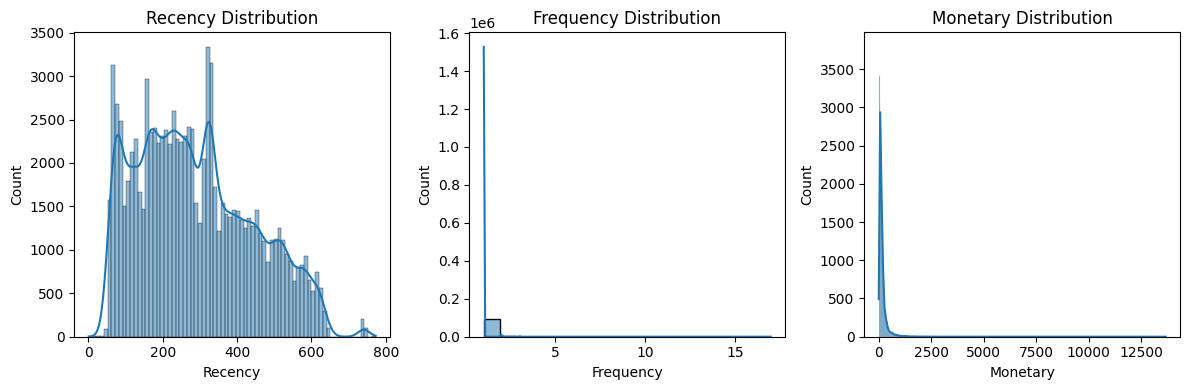

In [22]:
# Ve phan phoi de kiem tra
# Tạo đồ thị
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Sử dụng sns.histplot để thay thế sns.distplot
sns.histplot(rfm_df['Recency'], kde=True, ax=ax[0])
ax[0].set_title('Recency Distribution')

sns.histplot(rfm_df['Frequency'], kde=True, ax=ax[1])
ax[1].set_title('Frequency Distribution')

sns.histplot(rfm_df['Monetary'], kde=True, ax=ax[2])
ax[2].set_title('Monetary Distribution')

plt.tight_layout()
plt.show()

In [23]:
data_rfm = rfm_df[['Recency', 'Frequency', 'Monetary']]

In [24]:
print(data_rfm[data_rfm['Monetary'] <= 0])

       Recency  Frequency  Monetary
29977       51          1       0.0
56518       45          1       0.0


In [25]:
data_rfm = data_rfm[data_rfm['Monetary'] > 0]

In [26]:
import numpy as np
from sklearn.preprocessing import StandardScaler

data_log = np.log(data_rfm)
scaler = StandardScaler()
scaler.fit(data_log)
data_normalized = scaler.transform(data_log)
data_normalized = pd.DataFrame(data=data_normalized, index=data_rfm.index, columns=data_rfm.columns)

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=1) 
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_
data_rfm_k5 = data_rfm.assign(Cluster=cluster_labels)
grouped = data_rfm_k5.groupby(['Cluster'])
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
  }).round(1)

Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
0         365.4       1.0     68.6  38735
1         337.8       1.0    317.3  29242
2         115.7       1.0    124.6  25119
3         246.5       3.4    534.4    252
4         271.3       2.0    294.8   2745

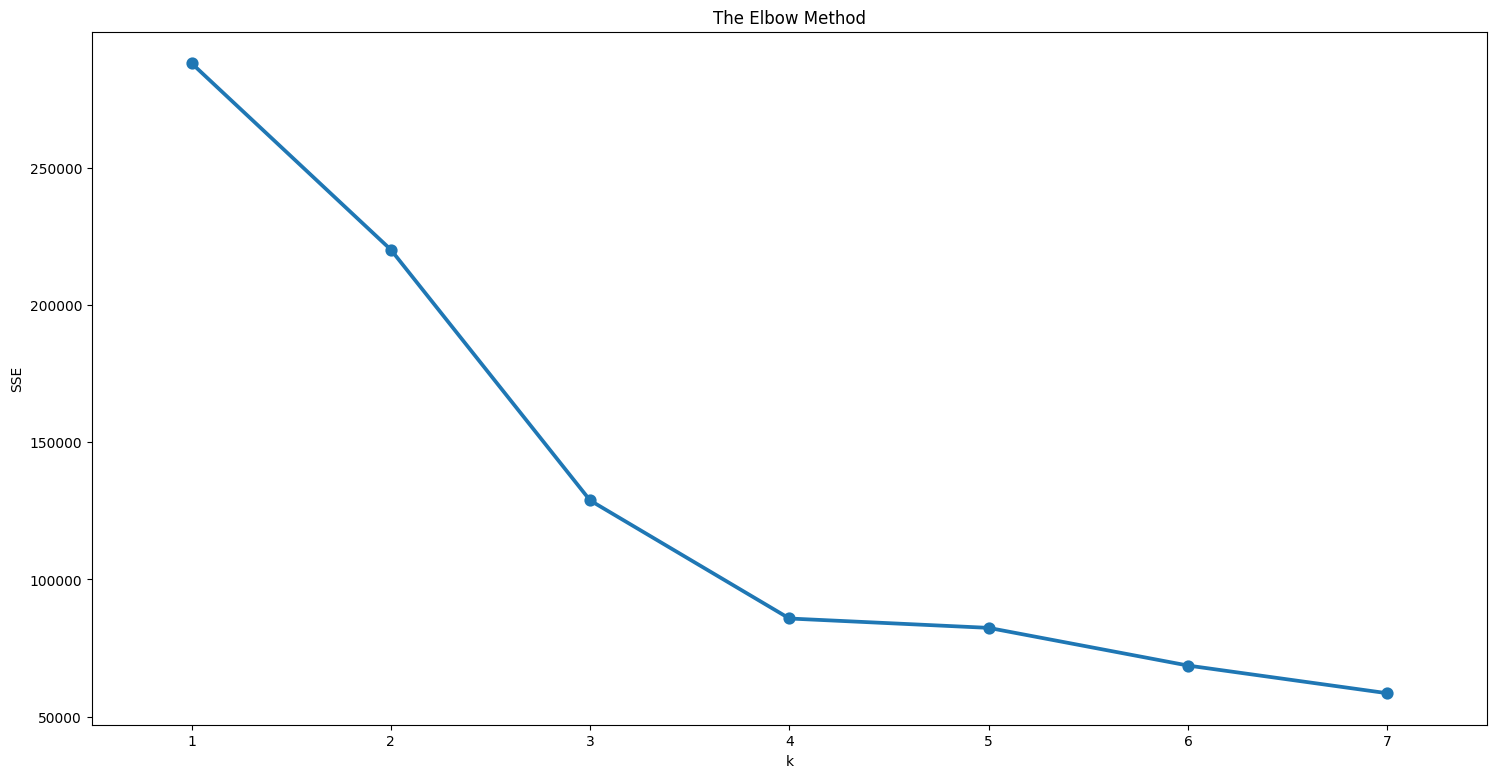

In [29]:
sse = {}
for k in range(1, 8):  
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_
plt.figure(figsize=(18,9))

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [31]:
from sklearn.metrics import silhouette_score
range_k = range(2, 8)  # Kiểm tra từ 2 đến 7 cụm
silhouette_scores = []
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_normalized)
    silhouette_avg = silhouette_score(data_normalized, cluster_labels)
    silhouette_scores.append(silhouette_avg)
plt.figure(figsize=(10, 5))
plt.plot(range_k, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range_k)
plt.grid()
plt.show()

KeyboardInterrupt: 